In [ ]:
# looking over annotations ------------------------------------------------------------------------------------
# In pig 5 the microtrend failed to work.  Shortly before that point the resuscitation algorithm had changed so that 
    # it wasn't needed but there was still code in it that expected values to be there.  So the resuscitation code was
    # crashing on that.  I needed to remove the code that depended on the pCO2 values and then restart the system.  
    # Thus there are two sessions, one that leads up to the resuscitation and one that goes from when the resuscitation starts.

# for pig in ['pig_06_20200922_084158']: # additional annotation: Irvin Pierskalla collected PCO2 data from three devices during yesterday's 
    # pig study.  The data from our linked device was useless. However, the CVS file attached from one of the two other
    # probes gave excellent trending data. The first 45 minutes is actually human data, Irvin but the probe in his 
    # own mouth to make sure it was accurate! Then we switched it into the pig. I believe the time is one hour off as 
    # he was using Central Time. Still, the change sin PCO2 trend nicely baseline, bleed, wait and resuscitation phases.       Please add this file to the #6 pig data file and delete the PCO2 one already there or mark it "bad data".

# for pig in ['pig_07_20200924_084150']: # just a formatting issue with \'

# for pig in ['pig_08_20201013_080142']: # just differnt spacing

# for pig in ['pig_13_03252021_501_20210325_082946']: # just " instead of ' 

# for pig in ['pig_14_20210330_113521']: # just a formatting issue with \'

# In pig 16, the device that records the timing synchronization data for the Braedius camera/laptop wasn't working.  
    # In the supplemental session, I have that "working".  (I say "working" because I just found out that I wasn't 
    # sending all of the synchronization time bits and it now becomes a puzzle to decode the times stored in 
    # "daq.Clicktrack") The supplemental session starts only after resuscitation has completely finished. Many of 
    # the devices were already shutdown by the time I created a new session and the session only lasts for
    # about 12 minutes or so

# 1st 12 pigs getting norep delayed first .5ml, after fixed
# 1,2,3 came close to failure
# dobutamine was available but perhaps not used in pigs 1-14

import os

path = '/zfsauton/data/public/vleonard/tracir/'

for pig in sorted(os.listdir(path+'sessions/')):

    if pig in ['pig_04_20200908_101618', 'pig_05_20200910_095434', 'pig_16_20210518_184343_supplemental', 'pig_24_20211130_125421']: continue
    print(pig)
    print('processing file:', path+'sessions/'+pig+'/logs/logfile_debug.log')
    file1 = open(path+'sessions/'+pig+'/logs/logfile_debug.log', 'r')
    lines = file1.readlines()
    
    annotations1 = [l for l in lines if 'Adding annotation' in l]
    
    if os.path.exists(path+'sessions/'+pig+'/annotations.txt'):
        file1 = open(path+'sessions/'+pig+'/annotations.txt', 'r')
    else:
        print(path+'sessions/'+pig+'/annotations.txt does not exist')
        continue    
    lines = file1.readlines()
    annotations2 = [l for l in lines if 'text' in l]
    annotations2 = [l.replace("\"", "\'").replace('    ','').replace('\n','') for l in annotations2]
#     for a in annotations1:
#         print(a)
#     for a in annotations2:
#         print(a)
        
    print('lengths check:', len(annotations1)==len(annotations2), len(annotations1), len(annotations2))
    for i in range(len(annotations1)):
        # print(annotations2[i] in annotations1[i])
        if annotations2[i] not in annotations1[i]:
            print('mismatch found:')
            print(annotations2[i])
            print(annotations1[i])
#     break

In [ ]:
# looking over annotations ------------------------------------------------------------------------------------
import os
import glob

# path = '/zfsauton/data/public/xinyul2/PigBleed/2020/'
path = '/zfsauton/data/public/vleonard/tracir/'

pig_nums = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', 
            '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

pig_logs = {}

for num in pig_nums:
    paths = sorted(glob.glob(path+"sessions/pig_"+num+"*"))    
    print('pig', num, paths)
    pig_logs[num] = []
    for p in paths:
        file1 = open(p+'/logs/logfile_debug.log', 'r')
        lines = file1.readlines()
        pig_logs[num].extend(lines)

        print('len of logs', len(pig_logs[num]))
    
    err1 = [l for l in pig_logs[num] if ('ERROR' in l ) and (('devices.pumps.neurowave' in l) or ('devices.neurowave.pump' in l))]
    if len(err1) > 0:
        print('Example Error', err1[0])
    # time = [' '.join(l.split(' ')[1:3]) for l in pig_logs[num]]

# for pig in ['pig_05_20200910_095434', 'pig_05_20200910_150930']:
# for pig in ['pig_16_20210518_184343_supplemental', 'pig_16_20210518_081155']:
#     print('processing file:', path+'sessions/'+pig+'/logs/logfile_debug.log')
#     file1 = open(path+'sessions/'+pig+'/logs/logfile_debug.log', 'r')
#     lines = file1.readlines()
    
#     annotations1 = [l for l in lines if 'Adding annotation' in l]
        
# #     file1 = open(path+'sessions/'+pig+'/annotations.txt', 'r')
# #     lines = file1.readlines()
# #     annotations2 = [l for l in lines if 'text' in l]
# #     annotations2 = [l.replace("\"", "\'").replace('    ','').replace('\n','') for l in annotations2]
#     for a in annotations1:
#         print(a)
# #     for a in annotations2:
# #         print(a)
        
# #     print(len(annotations1)==len(annotations2), len(annotations1), len(annotations2))
# #     for i in range(len(annotations1)):
# #         print(annotations2[i] in annotations1[i])
# #         if annotations2[i] not in annotations1[i]:
# #             print(annotations2[i])
# #             print(annotations1[i])
# # #     break


In [ ]:
## plotting the derivative of timestamps 

import h5py
import pandas as pd
import matplotlib.pyplot as plt
import os

h5_paths = "/zfsauton/data/public/vleonard/tracir/auv_files/"
paths = os.listdir(h5_paths)
paths.remove('p06_microtrend_data.xlsx')
paths = sorted(paths)
print(paths)

path_dict = {path: {} for path in paths}
# [1,2,3,4,7,8]
# [2,3,4,7,8] - [1,2,3,4,7]

for path in paths:
    f = h5py.File(h5_paths+path, 'r')
    
    plt.figure(1, figsize=(15,5))
    if 'pump.fluid' in f.keys():
        pump_fluid = pd.DataFrame(f['pump.fluid'][()])
        print(pump_fluid.columns, pump_fluid.dtypes)
        path_dict[path]['pump.fluid'] = pump_fluid.timestamp.values[1:]-pump_fluid.timestamp.values[:-1]

        plt.plot(pump_fluid.timestamp.values[1:]-pump_fluid.timestamp.values[:-1], label='pump.fluid')

    if 'pump.dobut' in f.keys():
        pump_dobut = pd.DataFrame(f['pump.dobut'][()])
        # print(pump_dobut.columns, pump_dobut.dtypes)
        path_dict[path]['pump.dobut'] = pump_dobut.timestamp.values[1:]-pump_dobut.timestamp.values[:-1]

        plt.plot(pump_dobut.timestamp.values[1:]-pump_dobut.timestamp.values[:-1], label='pump.dobut')
        
    plt.legend(loc='upper left')        
    plt.title(path + ' pump time derivatives'); plt.show()



In [ ]:
from datetime import datetime

# pump_fluid.timestamp.values[0]
timestamp = 1639660632.315818
dt_object = datetime.fromtimestamp(timestamp)
print(dt_object)
print(datetime.now())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
p01.h5 Index(['timestamp', 'CCO', 'SvO2', 'Pleth', 'SpO2', 'PAP', 'CVP', 'ART',
       'AirPr', 'ECG'],
      dtype='object') (3759700, 10)


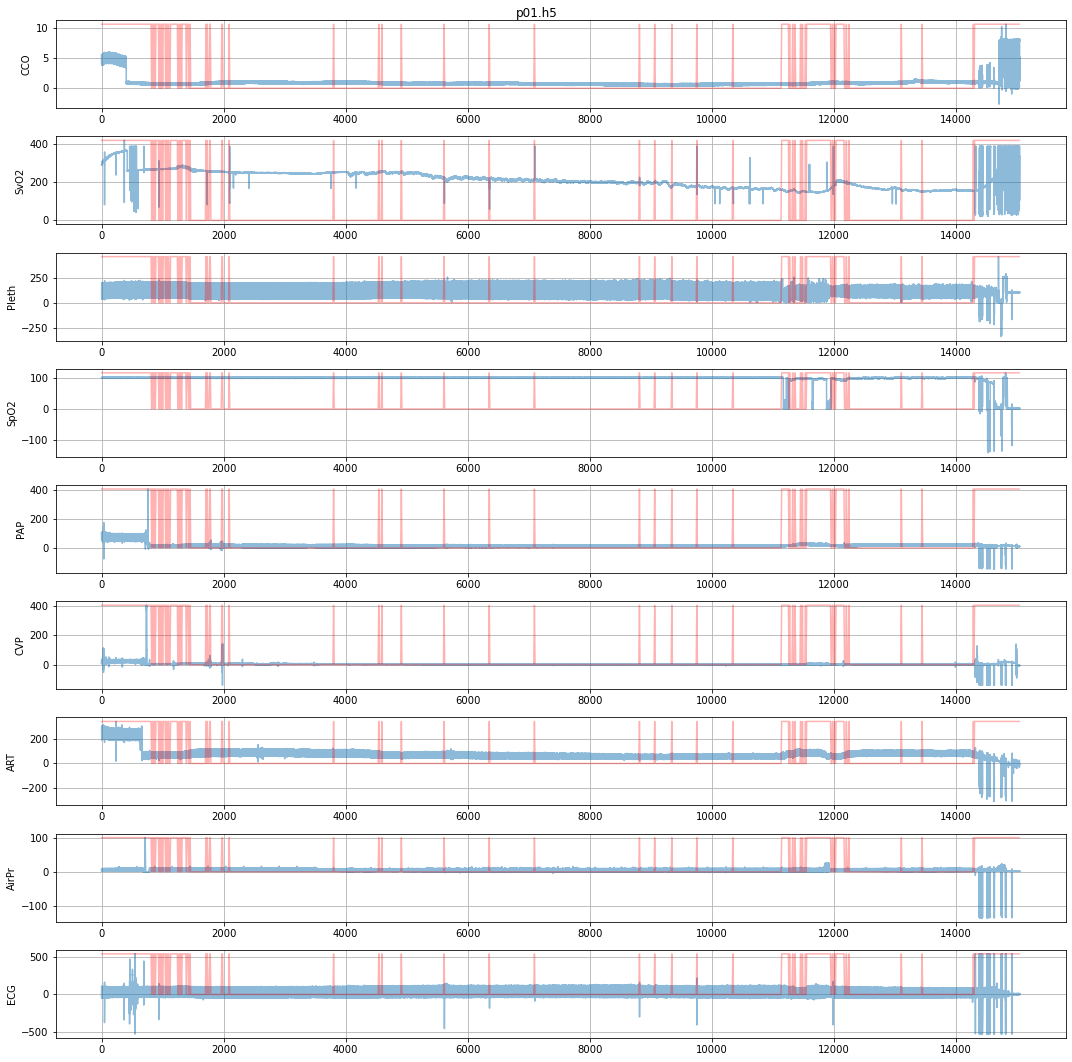

In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from datetime import datetime
from pyod.models.iforest import IForest
import neurokit2 as nk
from tqdm import trange
sys.path.append('../')
from signal_quality import featurization, sqis


h5_paths = "/zfsauton/data/public/vleonard/tracir/auv_files/"
paths = ['p01.h5', 'p02.h5', 'p03.h5', 'p04.h5', 'p05.h5', 
    'p06.h5', 'p07.h5', 'p08.h5', 'p09.h5', 'p10.h5', 
    'p11.h5', 'p12.h5', 'p13.h5', 'p14.h5', 'p15.h5',
    'p16.h5', 'p17.h5', 'p18.h5', 'p19.h5', 'p20.h5', 
    'p21.h5', 'p22.h5', 'p23.h5', 'p24.h5', 'p25.h5',]
    # 'p26.h5']

path_dict = {path: {} for path in paths}
# [1,2,3,4,7,8]
# [2,3,4,7,8] - [1,2,3,4,7]

def plot_df(data, anomalies=None, title=''):
    fig, axs = plt.subplots(nrows=len(data.columns), figsize=(15,15))
    fig.suptitle(title)

    for i in range(len(axs)):
        ylims = (np.percentile(data.iloc[:,i].values, q=1), np.percentile(data.iloc[:,i].values, q=99))
        
        axs[i].plot(data.index, data.iloc[:,i], alpha=.5) 
        # axs[i].set_ylim(ylims[0], ylims[1])
        axs[i].set_ylabel(data.columns[i])

        if anomalies is not None:
            xs = [i for i in range(int(data.index[0]), int(data.index[-1]), step_size)]
            axs[i].plot(xs, anomalies*np.nanmax(data.iloc[:,i]), alpha=.3, c='r') 

        # axs[i].legend(loc='lower left'); 
        axs[i].grid()

    fig.tight_layout()
    fig.show()

sampling_rate = 125
step_size = 10 # seconds
for path in paths:
    f = h5py.File(h5_paths+path, 'r')
    data = pd.DataFrame(f['daq'][()])

    for bad_col in ['ECG_SQ', 'XXXX', 'Clicktrack']:
        if bad_col in data.columns:
            data.drop(columns=[bad_col], inplace=True)

    print(path, data.columns, data.shape)

    data['timestamp'] -= np.min(data['timestamp'])
    # data['timestamp'] /= 3600
    data.set_index('timestamp', inplace=True)

    features = np.load(path[:-3]+'.npy').squeeze()
    features = np.nan_to_num(features, posinf=0, neginf=0)
    features = features[:]

    clf = IForest(n_estimators=500,
                 max_samples="auto",
                 contamination=0.2,
                 max_features=1.,
                 bootstrap=True,
                 n_jobs=1,
                 behaviour='old',
                 random_state=0)
    clf.fit(features)
    predictions = clf.predict(features)

    plot_df(data, anomalies=predictions, title=path)
    break
    # data.plot(use_index=True, ylim=ylims, subplots=True, figsize=(15,15), grid=True, xlabel='hours')

In [4]:
import numpy as np
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

data = np.load('p01.npy')
data = data.squeeze()
nan_predictions = np.any(np.isnan(data), axis=1)
data = np.nan_to_num(data, posinf=0, neginf=0)
print(data.shape)

clf = IForest(n_estimators=100,
                 max_samples="auto",
                 contamination=0.1,
                 max_features=1.,
                 bootstrap=False,
                 n_jobs=1,
                 behaviour='old',
                 random_state=0)
clf.fit(data)

predictions = clf.predict(data)

plt.plot(predictions)
plt.show()

plt.plot(nan_predictions)
plt.show()


(1504, 130)


AttributeError: module 'pyod.models' has no attribute 'iforest'